In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)

Mounted at /content/drive


In [ ]:
!pip install imbalanced-learn

In [ ]:
import zipfile

# Specify the path to the ZIP file
zip_file_path = "/content/drive/MyDrive/Projects/Electric_theft_detection/Dataset/file.zip"

# Specify the directory where you want to extract the contents
extract_to_directory = "/content/dataset/"

# Create the directory if it doesn't exist
import os
os.makedirs(extract_to_directory, exist_ok=True)

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

# List the extracted files
extracted_files = os.listdir(extract_to_directory)
print("Extracted files:")
print(extracted_files)

Extracted files:
['data.csv']


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
from seaborn import distplot
from seaborn import heatmap
import matplotlib.pyplot as plt
from matplotlib import style
import math
import time
import datetime
import numpy as np
from tqdm import tqdm
import multiprocessing
import pickle
from math import isinf
from scipy.interpolate import interp1d
from numpy import array, zeros, full, argmin, inf, ndim
from sklearn import preprocessing

In [ ]:
df=pd.read_csv('/content/dataset/data.csv')

In [ ]:
l=df.columns
la=['CONS_NO','FLAG']
lb=[]
for i in l:
    if i not in la:
        lb.append(i)

In [ ]:
dates = [datetime.datetime.strptime(ts, "%Y/%m/%d") for ts in lb]
#dates.sort()
fdates = [datetime.datetime.strftime(ts, "%Y/%m/%d") for ts in dates]

In [ ]:
fdates.insert(0,"FLAG")
fdates.insert(0,"CONS_NO")

In [ ]:
df.columns=fdates

In [ ]:
dates = [datetime.datetime.strptime(ts, "%Y/%m/%d") for ts in lb]
dates.sort()
sorteddates = [datetime.datetime.strftime(ts, "%Y/%m/%d") for ts in dates]

In [ ]:
cols=df.columns.tolist()[0:2]+sorteddates
df=df[cols]

In [ ]:
df1 = df.copy()

In [ ]:
df1 = df1.fillna(df1.median())

<ipython-input-69-820f0070d1a2>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1 = df1.fillna(df1.median())


In [ ]:
df1 = df1.drop(['CONS_NO'], axis = 1)

In [ ]:
df_0 = df1[df1['FLAG'] == 0].drop('FLAG', axis=1).reset_index(drop=True) # Normal user
df_1 = df1[df1['FLAG'] == 1].drop('FLAG', axis=1).reset_index(drop=True) # Abnormal user (energy thief)

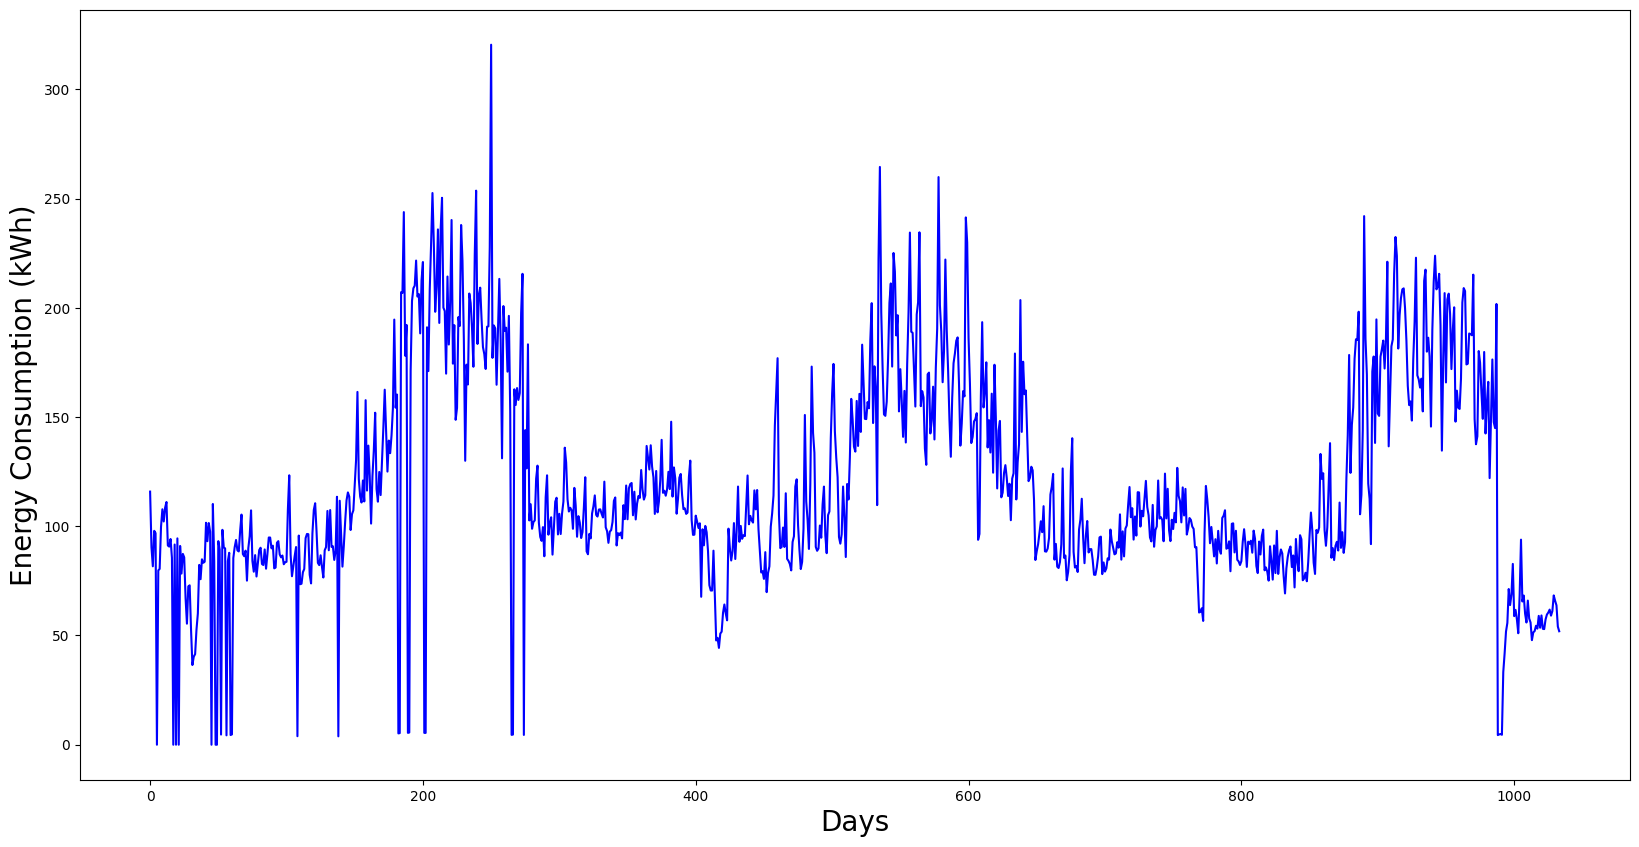

In [ ]:
import random
#normal_row = random.randint(0, 38756)
normal_row = 35
plt.style.use('default')
plt.figure(figsize=(20, 10))
plt.plot(df_0.iloc[normal_row].to_list(), color='blue')
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.savefig('normal.png')

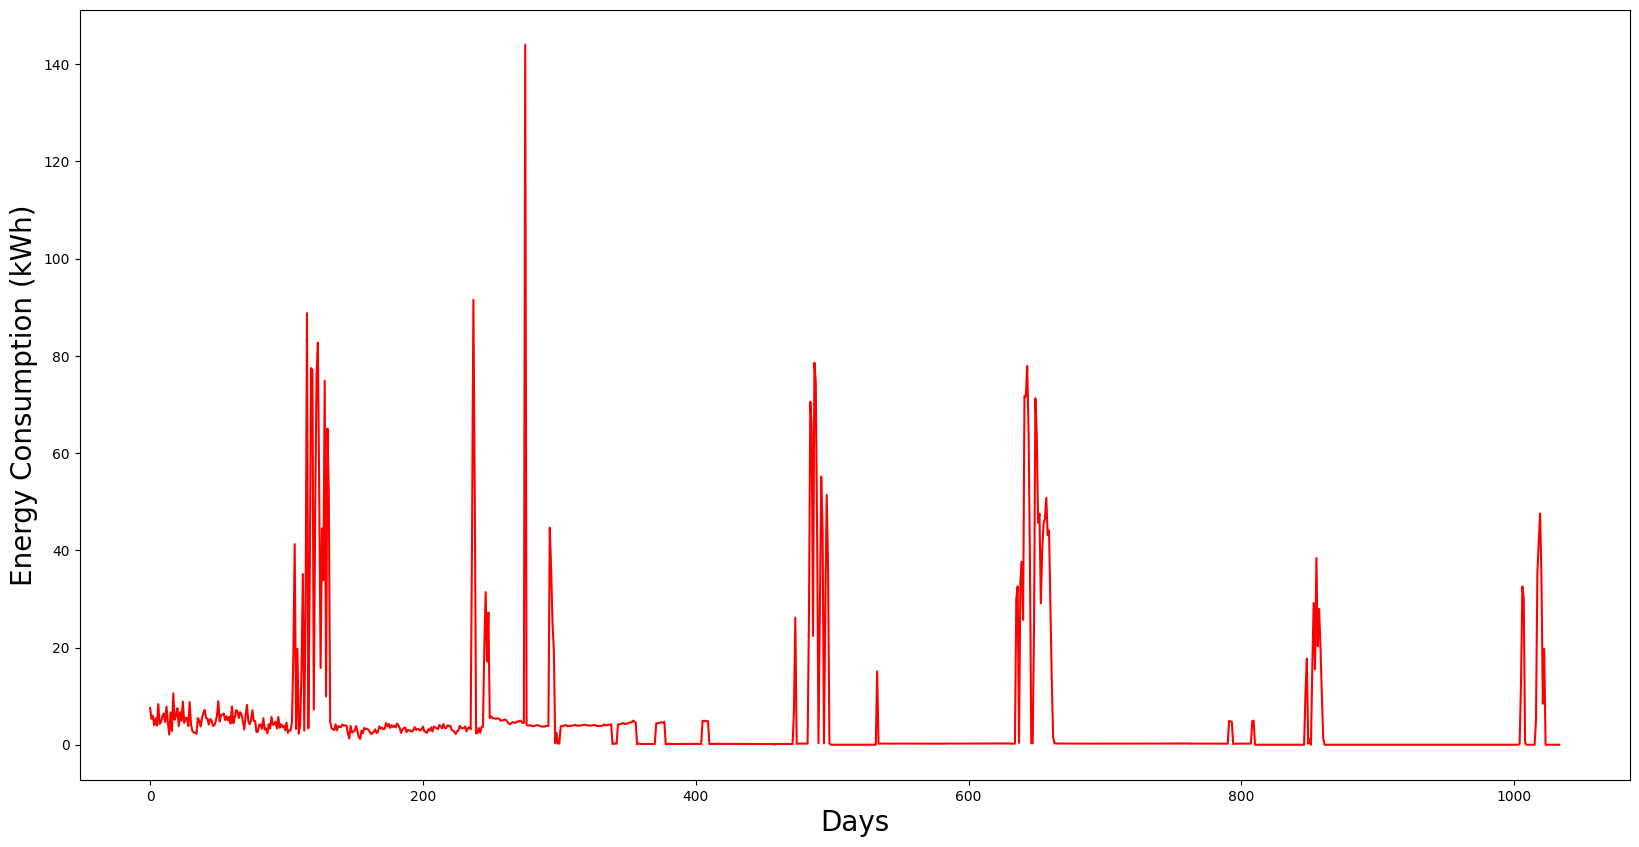

In [ ]:
abnormal_row = random.randint(0, 3614)
plt.figure(figsize=(20, 10))
plt.plot(df_1.iloc[abnormal_row].to_list(), color='red')
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.savefig('abnormal.png')

In [ ]:
spring_0 = df.loc[:, '2015/04/01':'2015/06/01']
summer_0 = df.loc[:, '2015/06/01':'2015/09/01']
autumn_0 = df.loc[:, '2015/09/01':'2015/11/01']
winter_0 = df.loc[:, '2014/11/01':'2015/04/01']

In [ ]:
avg_spring_0 = spring_0.mean(axis=0)
avg_summer_0 = summer_0.mean(axis=0)
avg_autumn_0 = autumn_0.mean(axis=0)
avg_winter_0 = winter_0.mean(axis=0)

In [ ]:
total_0 = len(avg_spring_0)+len(avg_summer_0)+len(avg_autumn_0)+len(avg_winter_0)

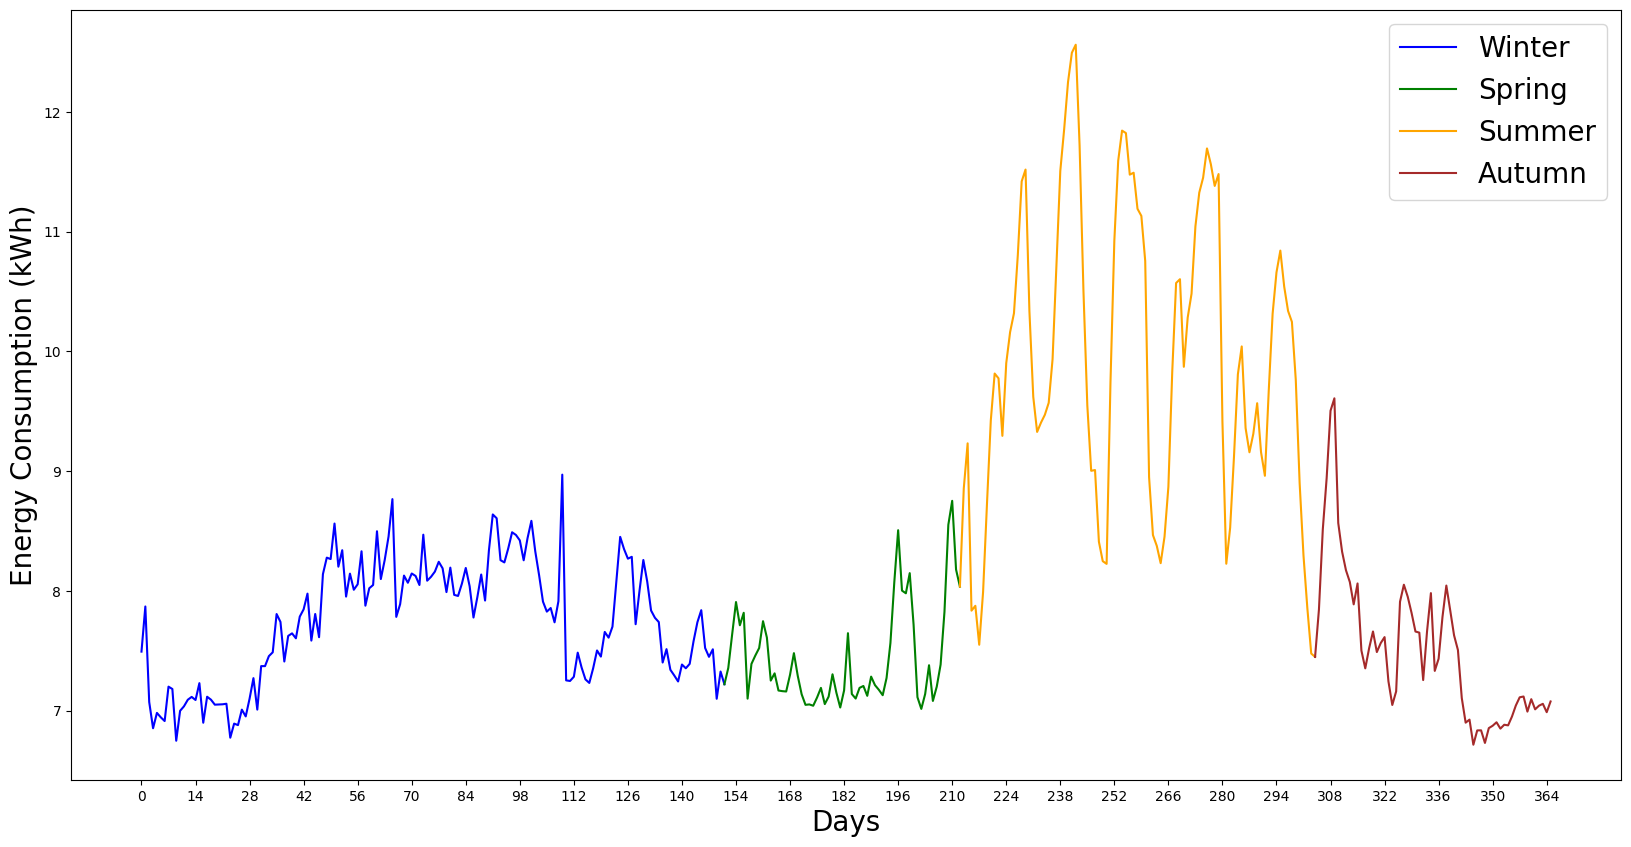

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(avg_winter_0, color='blue')
plt.plot(avg_spring_0, color='green')
plt.plot(avg_summer_0, color='orange')
plt.plot(avg_autumn_0, color='brown')
plt.xticks(range(0, total_0, 14), range(0, total_0, 14))
#plt.yticks(range(0, 25, 5), range(0, 25, 5))
plt.xlabel('Days', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=20)
plt.legend(['Winter', 'Spring', 'Summer', 'Autumn'], fontsize=20)
plt.savefig('Seasonality')

In [ ]:
dataset = pd.read_csv('/content/dataset/data.csv')

In [ ]:
dataset.head(10)

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31
5,6BCFD78138BC72A9BA1BFB0B79382192,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.82,5.52,3.12,3.13,4.20,3.23,3.85,2.78,3.55,2.54
6,34C1954AA3703C4F8BD8EAEA7C4B7B83,1,0.11,0.53,0.45,0.51,1.32,0.71,0.12,0.52,...,4.33,2.46,1.23,3.19,1.17,1.36,0.56,1.02,1.96,1.83
7,768309B0EB11FD436CEE5ABFB84F4C0C,1,0.91,0.86,1.10,0.66,5.82,3.17,1.18,4.05,...,2.36,2.82,2.28,3.70,3.07,4.61,3.13,3.10,3.74,3.13
8,D0A186208CE83FBCCF730857C9A75B6F,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.36,3.41,4.73,3.54,4.20,2.77,3.02,4.06,4.75,4.86
9,516954F5FF177CE314656D727FCC66A5,1,11.02,8.24,7.94,7.92,8.31,7.39,8.27,8.05,...,51.36,52.39,113.35,60.89,115.62,108.69,87.88,86.36,81.51,81.75


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42372 entries, 0 to 42371
Columns: 1036 entries, CONS_NO to 2016/9/9
dtypes: float64(1034), int64(1), object(1)
memory usage: 334.9+ MB


In [ ]:
dataset.shape

(42372, 1036)

In [ ]:
dataset.columns

Index(['CONS_NO', 'FLAG', '2014/1/1', '2014/1/10', '2014/1/11', '2014/1/12',
       '2014/1/13', '2014/1/14', '2014/1/15', '2014/1/16',
       ...
       '2016/9/28', '2016/9/29', '2016/9/3', '2016/9/30', '2016/9/4',
       '2016/9/5', '2016/9/6', '2016/9/7', '2016/9/8', '2016/9/9'],
      dtype='object', length=1036)

In [ ]:
x = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (42372, 1034)
Shape of y: (42372,)


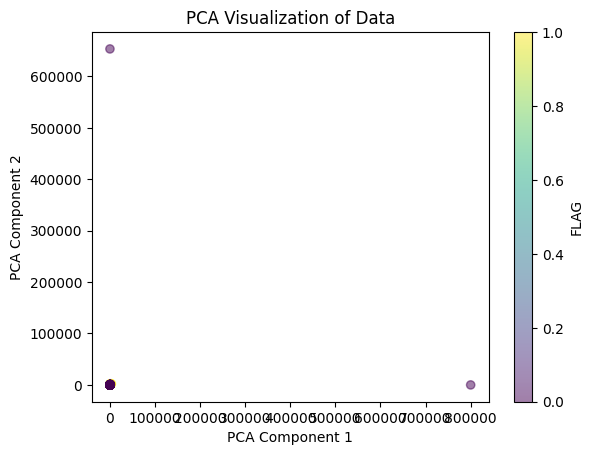

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

# Performing PCA on the imputed data
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_imputed)

# Plotting the reduced x in 2D
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Data')
plt.colorbar(label='FLAG')
plt.show()


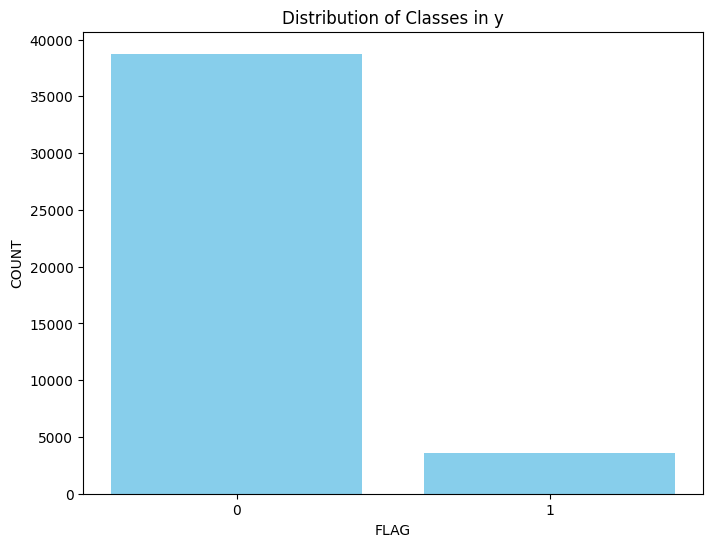

In [ ]:
# Assuming you have already defined y
unique_classes, class_counts = np.unique(y, return_counts=True)

plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts, color='skyblue')
plt.xlabel('FLAG')
plt.ylabel('COUNT')
plt.title('Distribution of Classes in y')
plt.xticks(unique_classes)
plt.show()

In [ ]:
unique, count = np.unique(y, return_counts=True)
y_dist_val_cnt = {k: v for (k, v) in zip(unique, count)}

In [ ]:
y_dist_val_cnt

{0: 38757, 1: 3615}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.impute import SimpleImputer

# Function to perform SMOTE with under-sampling
def smote_with_undersampling(X, y, ratio=1.0):
    # Count of number of samples in each class
    class_counts = Counter(y)

    # Determining the class with fewer samples
    minority_class = min(class_counts, key=class_counts.get)
    majority_class = max(class_counts, key=class_counts.get)

    # Creating SMOTE and Undersampler instances with the specified ratio
    smote = SMOTE(sampling_strategy=ratio, random_state=42)
    undersampler = RandomUnderSampler(sampling_strategy=ratio, random_state=42)

    # Applying SMOTE to create synthetic samples for the minority class
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Applying undersampling to reduce the number of samples in the majority class
    X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)

    # Counting the number of samples in each class in the final resampled dataset
    final_class_counts = Counter(y_resampled)

    return X_resampled, y_resampled, final_class_counts

# Read data into pandas DataFrame
import pandas as pd
dataset = pd.read_csv('/content/dataset/data.csv')

# Assuming x contains the features and y contains the labels
x = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values

# Handling missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

# Applying SMOTE with under-sampling
desired_ratio = 1.0
x_resampled, y_resampled, final_class_counts = smote_with_undersampling(x_imputed, y, ratio=desired_ratio)

# The final_class_counts will now contain equal numbers of samples for both classes
print("Final class counts:", final_class_counts)

Final class counts: Counter({0: 38757, 1: 38757})


In [ ]:
unique, count = np.unique(y, return_counts=True)
y_dist_val_cnt = {k: v for (k, v) in zip(unique, count)}
y_dist_val_cnt

{0: 38757, 1: 3615}

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
x_train

array([[14.83      ,  0.        ,  9.23      , ...,  6.48      ,
         6.47      ,  7.31      ],
       [13.36      , 13.79      , 12.1       , ..., 16.77      ,
        14.83      , 14.33      ],
       [ 8.21      ,  4.97      ,  5.36      , ...,  7.29      ,
         5.18      ,  5.36      ],
       ...,
       [ 4.72238081,  3.9435998 ,  5.02496315, ..., 16.56008196,
        16.00902015, 14.81148445],
       [ 7.16873521,  6.9542023 ,  6.78409942, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.1       ,  0.        , ...,  2.47      ,
         1.25      ,  1.34      ]])

In [ ]:
x_test

array([[ 8.47108649,  7.51731706,  8.64374725, ...,  1.15486304,
         1.12354105,  1.09050073],
       [39.13      , 46.57      , 51.23      , ..., 24.82      ,
        15.16      , 28.16      ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 4.40297319,  0.8768069 ,  5.0337888 , ...,  9.3472606 ,
         7.00612469,  6.97239136],
       [ 7.16873521,  6.9542023 ,  6.78409942, ...,  5.53      ,
         5.14      ,  7.15      ],
       [ 7.16873521,  6.9542023 ,  6.78409942, ...,  6.19      ,
         5.68      ,  6.2       ]])

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, GRU, Dense, LeakyReLU, BatchNormalization, Dropout, Flatten, TimeDistributed
from tensorflow.keras import Input

# Function to create LSTM feature extractor
def create_lstm_feature_extractor(inputs):
    x = LSTM(units=200, return_sequences=True)(inputs)
    x = LeakyReLU(alpha=0.001)(x)
    x = LSTM(units=200, return_sequences=True)(x)
    x = LeakyReLU(alpha=0.001)(x)
    x = LSTM(units=100, return_sequences=True)(x)
    x = LeakyReLU(alpha=0.001)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    return x

# Function to create TLGRU model
def create_tlgru_model(timesteps, features):
    inputs = Input(shape=(timesteps, features))
    x = create_lstm_feature_extractor(inputs)
    x = TimeDistributed(Dense(units=1))(x)
    x = GRU(units=50, return_sequences=True)(x)
    x = GRU(units=50, return_sequences=True)(x)
    x = Flatten()(x)
    x = Dropout(0.2)(x)
    outputs = Dense(units=1)(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Assuming x_train, y_train, x_test, y_test are already defined and preprocessed
# Reshape x_train
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Reshape x_test
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Reshape y_train
y_train = np.reshape(y_train, (y_train.shape[0], 1))

# Reshape y_test
y_test = np.reshape(y_test, (y_test.shape[0], 1))

# Create TLGRU model
tlgru_model = create_tlgru_model(x_train.shape[1], 1)

# Assuming your TLGRU model is named 'tlgru_model'
tlgru_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1034, 1)]         0         
                                                                 
 lstm (LSTM)                 (None, 1034, 200)         161600    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 1034, 200)         0         
                                                                 
 lstm_1 (LSTM)               (None, 1034, 200)         320800    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 1034, 200)         0         
                                                                 
 lstm_2 (LSTM)               (None, 1034, 100)         120400    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 1034, 100)         0     

In [ ]:

# Compile the model
optimizer = Adam(learning_rate=0.001)
tlgru_model.compile(optimizer=optimizer, loss='mse')

# Define batch size and number of epochs
batch_size = 32
epochs = 10

# Train the model
history = tlgru_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Evaluate the model
loss = tlgru_model.evaluate(x_test, y_test)
print("Test Loss:", loss)


Epoch 1/10
1938/1938 [==============================] - 393s 196ms/step - loss: 0.1950 - val_loss: 0.1501
Epoch 2/10
1938/1938 [==============================] - 376s 194ms/step - loss: 0.1394 - val_loss: 0.1184
Epoch 3/10
1938/1938 [==============================] - 375s 193ms/step - loss: 0.1204 - val_loss: 0.1274
Epoch 4/10
1938/1938 [==============================] - 374s 193ms/step - loss: 0.1080 - val_loss: 0.1047
Epoch 5/10
1938/1938 [==============================] - 375s 193ms/step - loss: 0.0983 - val_loss: 0.0982
Epoch 6/10
1938/1938 [==============================] - 376s 194ms/step - loss: 0.0908 - val_loss: 0.0929
Epoch 7/10
1938/1938 [==============================] - 376s 194ms/step - loss: 0.0847 - val_loss: 0.0832
Epoch 8/10
1938/1938 [==============================] - 384s 198ms/step - loss: 0.0786 - val_loss: 0.0816
Epoch 9/10
1938/1938 [==============================] - 376s 194ms/step - loss: 0.0750 - val_loss: 0.0799
Epoch 10/10
485/485 [=========================

In [ ]:
# Save the model
tlgru_model.save("/content/model.h5")

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Predicting on test data
y_pred = (tlgru_model.predict(x_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

485/485 [==============================] - 38s 75ms/step
Accuracy: 0.9216925756305231
Confusion Matrix:
[[6660 1010]
 [ 204 7629]]


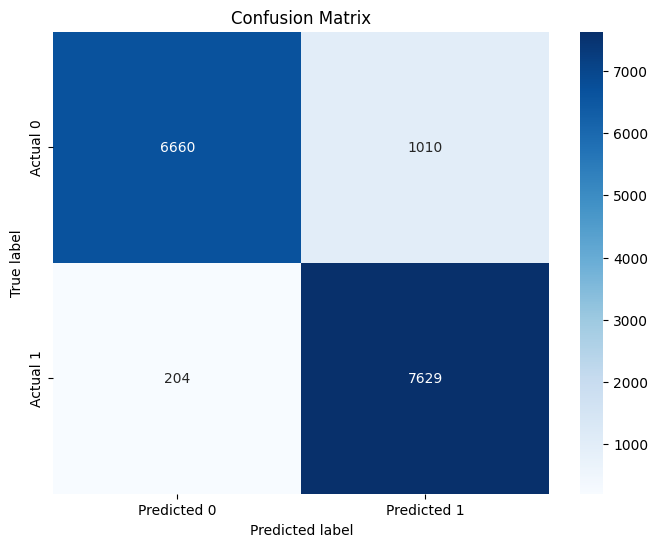

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have trained your model and obtained predictions
predictions = tlgru_model.predict(x_test)

# Convert predictions to binary values (0 or 1)
predictions_binary = (predictions > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, predictions_binary))

485/485 [==============================] - 40s 77ms/step
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      7670
           1       0.88      0.97      0.93      7833

    accuracy                           0.92     15503
   macro avg       0.93      0.92      0.92     15503
weighted avg       0.93      0.92      0.92     15503



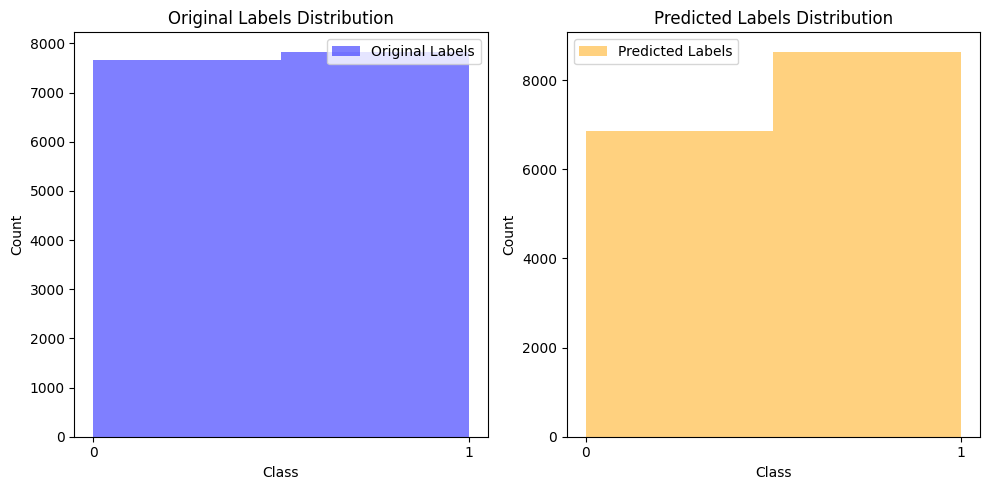

In [ ]:
# Convert predictions to binary values (0 or 1)
predictions_binary = (predictions > 0.5).astype(int)

# Flatten the labels for easier comparison
y_test_flat = y_test.flatten()
predictions_flat = predictions_binary.flatten()

# Plot original labels vs predicted labels
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(y_test_flat, bins=2, color='blue', alpha=0.5, label='Original Labels')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Original Labels Distribution')
plt.xticks([0, 1])
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(predictions_flat, bins=2, color='orange', alpha=0.5, label='Predicted Labels')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Predicted Labels Distribution')
plt.xticks([0, 1])
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Assuming you have obtained predictions and true labels
predictions = tlgru_model.predict(x_test)
predictions_binary = (predictions > 0.5).astype(int)

# Print sample original and predicted labels
num_samples = 10  # Number of samples to print
print("Sample Original vs Predicted Labels:")
for i in range(num_samples):
    print("Sample", i+1, " - Original:", y_test[i], "Predicted:", predictions_binary[i])

485/485 [==============================] - 38s 78ms/step
Sample Original vs Predicted Labels:
Sample 1  - Original: [1] Predicted: [1]
Sample 2  - Original: [0] Predicted: [0]
Sample 3  - Original: [0] Predicted: [0]
Sample 4  - Original: [0] Predicted: [0]
Sample 5  - Original: [0] Predicted: [0]
Sample 6  - Original: [1] Predicted: [1]
Sample 7  - Original: [0] Predicted: [0]
Sample 8  - Original: [1] Predicted: [1]
Sample 9  - Original: [0] Predicted: [0]
Sample 10  - Original: [0] Predicted: [0]


In [1]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('flag_1_data.csv')

# Select a random sample from the dataset
sample_input = dataset.sample(n=1)

# Display the sample input with complete columns
print("Sample Input:")
print(sample_input)

# Save the sample input to a new CSV file
sample_input.to_csv('sample_input.csv', index=False)

Sample Input:
                               CONS_NO  FLAG  2014/1/1  2014/1/10  2014/1/11  \
2657  9185A00B3F9DE5DFD070844D1679B668     1     17.64        0.0        0.0   

      2014/1/12  2014/1/13  2014/1/14  2014/1/15  2014/1/16  ...  2016/9/28  \
2657        0.0        0.0        0.0        0.0        0.0  ...       3.48   

      2016/9/29  2016/9/3  2016/9/30  2016/9/4  2016/9/5  2016/9/6  2016/9/7  \
2657       5.24      4.01       5.06      2.96      4.01      5.19      6.25   

      2016/9/8  2016/9/9  
2657      3.41      2.97  

[1 rows x 1036 columns]


In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the trained model
tlgru_model = load_model('../Model/model.h5')  # Replace '/path/to/your/trained/model.h5' with the path to your trained model

# Load the new data
new_data = pd.read_csv('sample_input.csv')

# Assuming the structure of new_data is similar to the training data
# Extract features
x_new = new_data.iloc[:, 2:].values

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
x_new_imputed = imputer.fit_transform(x_new)

# Reshape data for model compatibility
x_new_reshaped = np.reshape(x_new_imputed, (x_new_imputed.shape[0], x_new_imputed.shape[1], 1))

# Pad or truncate sequences to match the required length
max_sequence_length = 1034  # Adjust this value according to your model's input shape
x_new_padded = pad_sequences(x_new_reshaped, maxlen=max_sequence_length, padding='post', truncating='post')

# Make predictions
predictions = tlgru_model.predict(x_new_padded)
predictions_binary = (predictions > 0.5).astype(int)

# Print predictions
print("Predictions for the new data:")
print(predictions_binary)


c:\Users\abira\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: [53]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


1/1 [==============================] - 2s 2s/step
Predictions for the new data:
[[0]]


1/1 [==============================] - 4s 4s/step


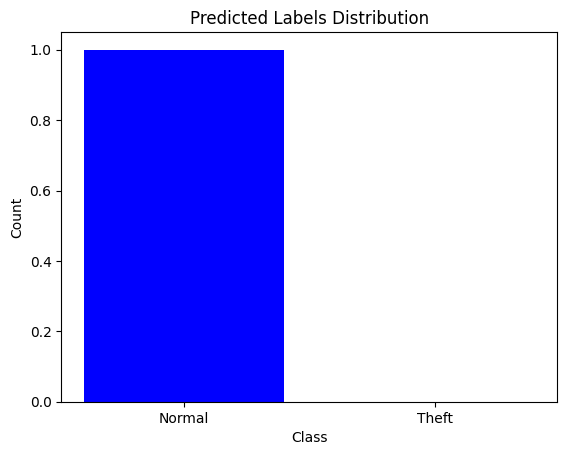

In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Load the trained model
tlgru_model = load_model('../Model/model.h5')

# Load the new data
new_data = pd.read_csv('sample_input.csv')

# Extract features
x_new = new_data.iloc[:, 2:].values

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
x_new_imputed = imputer.fit_transform(x_new)

# Reshape data for model compatibility
x_new_reshaped = np.reshape(x_new_imputed, (x_new_imputed.shape[0], x_new_imputed.shape[1], 1))

# Pad or truncate sequences to match the required length
max_sequence_length = 1034  # Adjust this value according to your model's input shape
x_new_padded = pad_sequences(x_new_reshaped, maxlen=max_sequence_length, padding='post', truncating='post')

# Make predictions
predictions = tlgru_model.predict(x_new_padded)
predictions_binary = (predictions > 0.5).astype(int)

# Count the occurrences of each class
class_counts = {0: 0, 1: 0}
for label in predictions_binary:
    class_counts[label[0]] += 1

# Plot the bar chart
plt.bar(class_counts.keys(), class_counts.values(), color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(list(class_counts.keys()), ['Normal', 'Theft'])
plt.title('Predicted Labels Distribution')
plt.show()


1/1 [==============================] - 1s 1s/step


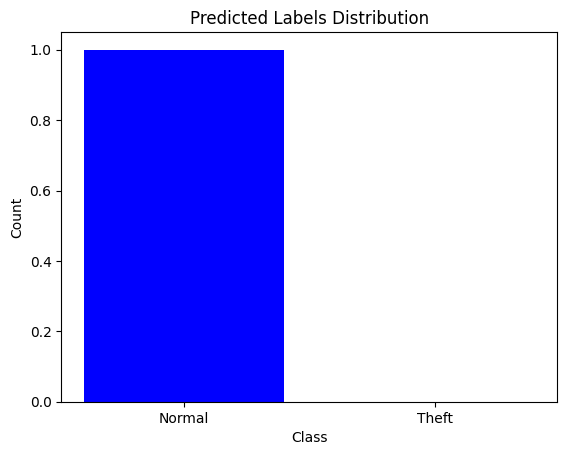

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Load the trained model
tlgru_model = load_model('/content/model.h5')

# Load the new data
new_data = pd.read_csv('/content/sample_input.csv')

# Extract features
x_new = new_data.iloc[:, 2:].values

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
x_new_imputed = imputer.fit_transform(x_new)

# Reshape data for model compatibility
x_new_reshaped = np.reshape(x_new_imputed, (x_new_imputed.shape[0], x_new_imputed.shape[1], 1))

# Pad or truncate sequences to match the required length
max_sequence_length = 1034  # Adjust this value according to your model's input shape
x_new_padded = pad_sequences(x_new_reshaped, maxlen=max_sequence_length, padding='post', truncating='post')

# Make predictions
predictions = tlgru_model.predict(x_new_padded)
predictions_binary = (predictions > 0.5).astype(int)

# Count the occurrences of each class
class_counts = {0: 0, 1: 0}
for label in predictions_binary:
    class_counts[label[0]] += 1

# Plot the bar chart
plt.bar(class_counts.keys(), class_counts.values(), color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(list(class_counts.keys()), ['Normal', 'Theft'])
plt.title('Predicted Labels Distribution')
plt.show()
